# Pandas



### Step 1. Import the necessary libraries

In [69]:
import pandas as pd
import numpy as np

In [70]:
import os

os.chdir('C:\\Users\\DILIP\\Documents')

### Step 3. Assign it to a variable called data.

In [73]:

data = pd.read_csv('new.txt', sep = '\t')

### Step 4. See the first 10 entries

In [74]:
data.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. What is the number of observations in the dataset?

In [17]:
# Solution 1

data.shape[0]  # entries <= 4622 observations

4622

In [18]:
# Solution 2

data.info() # entries <= 4622 observations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 180.6+ KB


### Step 6. What is the number of columns in the dataset?

In [19]:
data.shape[1]

5

### Step 7. Print the name of all the columns.

In [20]:
data.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

### Step 8. How is the dataset indexed?

In [21]:
data.index

RangeIndex(start=0, stop=4622, step=1)

### Step 9. Which was the most-ordered item? 

In [26]:
d = data.groupby('item_name')
d = d.sum()
d = d.sort_values(['quantity'], ascending=False)
d.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


### Step 10. For the most-ordered item, how many items were ordered?

In [27]:
e = data.groupby('item_name')
e = e.sum()
e = e.sort_values(['quantity'], ascending=False)
e.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


### Step 11. What was the most ordered item in the choice_description column?

In [28]:
f = data.groupby('choice_description').sum()
f = f.sort_values(['quantity'], ascending=False)
f.head(1)
# Diet Coke 159

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


### Step 12. How many items were orderd in total?

In [29]:
total_items_orders = data.quantity.sum()
total_items_orders

4972

### Step 13. Turn the item price into a float

#### Step 13.a. Check the item price type

In [30]:
data.item_price.dtype

dtype('O')

#### Step 13.b. Create a lambda function and change the type of item price

In [31]:
dollarizer = lambda x: float(x[1:-1])
data.item_price = data.item_price.apply(dollarizer)

#### Step 13.c. Check the item price type

In [32]:
data.item_price.dtype

dtype('float64')

### Step 14. How much was the revenue for the period in the dataset?

In [33]:
revenue = (data['quantity']* data['item_price']).sum()

print('Revenue was: $' + str(np.round(revenue,2)))

Revenue was: $39237.02


### Step 15. How many orders were made in the period?

In [34]:
orders = data.order_id.value_counts().count()
orders

1834

### Step 16. What is the average revenue amount per order?

In [37]:
# Solution 1

data['revenue'] = data['quantity'] *data['item_price']
order_grouped = data.groupby(by=['order_id']).sum()
order_grouped.mean()['revenue']

21.394231188658654

In [38]:
# Solution 2

data.groupby(by=['order_id']).sum().mean()['revenue']

21.394231188658654

### Step 17. How many different items are sold?

In [39]:
data.item_name.value_counts().count()

50

# Filtering and Sorting

### Step 1. This is the data given as a dictionary

In [78]:
# Create an example dataframe about a  army
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
            'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'],
            'deaths': [523, 52, 25, 616, 43, 234, 523, 62, 62, 73, 37, 35],
            'battles': [5, 42, 2, 2, 4, 7, 8, 3, 4, 7, 8, 9],
            'size': [1045, 957, 1099, 1400, 1592, 1006, 987, 849, 973, 1005, 1099, 1523],
            'veterans': [1, 5, 62, 26, 73, 37, 949, 48, 48, 435, 63, 345],
            'readiness': [1, 2, 3, 3, 2, 1, 2, 3, 2, 1, 2, 3],
            'armored': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1],
            'deserters': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
            'origin': ['Arizona', 'California', 'Texas', 'Florida', 'Maine', 'Iowa', 'Alaska', 'Washington', 'Oregon', 'Wyoming', 'Louisana', 'Georgia']}

### Step 2. Create a dataframe and assign it to a variable called army. 

#### Don't forget to include the columns names in the order presented in the dictionary ('regiment', 'company', 'deaths'...) so that the column index order is consistent with the solutions. If omitted, pandas will order the columns alphabetically.

In [79]:
data = pd.DataFrame(raw_data, columns = ['regiment', 'company', 'deaths', 'battles', 'size', 'veterans', 'readiness', 'armored', 'deserters', 'origin'])

### Step 3. Set the 'origin' colum as the index of the dataframe

In [81]:
data = data.set_index('origin')
data

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
California,Nighthawks,1st,52,42,957,5,2,0,24
Texas,Nighthawks,2nd,25,2,1099,62,3,1,31
Florida,Nighthawks,2nd,616,2,1400,26,3,1,2
Maine,Dragoons,1st,43,4,1592,73,2,0,3
Iowa,Dragoons,1st,234,7,1006,37,1,1,4
Alaska,Dragoons,2nd,523,8,987,949,2,0,24
Washington,Dragoons,2nd,62,3,849,48,3,1,31
Oregon,Scouts,1st,62,4,973,48,2,0,2


### Step 4. Print only the column veterans

In [82]:
data['veterans']

origin
Arizona         1
California      5
Texas          62
Florida        26
Maine          73
Iowa           37
Alaska        949
Washington     48
Oregon         48
Wyoming       435
Louisana       63
Georgia       345
Name: veterans, dtype: int64

### Step 5. Print the columns 'veterans' and 'deaths'

In [83]:
data[['veterans', 'deaths']]

,veterans,deaths
origin,,
Arizona,1,523
California,5,52
Texas,62,25
Florida,26,616
Maine,73,43
Iowa,37,234
Alaska,949,523
Washington,48,62
Oregon,48,62


### Step 6. Print the name of all the columns.

In [84]:
data.columns

Index(['regiment', 'company', 'deaths', 'battles', 'size', 'veterans',
       'readiness', 'armored', 'deserters'],
      dtype='object')

### Step 7. Select the 'deaths', 'size' and 'deserters' columns from Maine and Alaska

In [85]:
# Select all rows with the index label "Maine" and "Alaska"
data.loc[['Maine','Alaska'] , ["deaths","size","deserters"]]

,deaths,size,deserters
origin,,,
Maine,43,1592,3
Alaska,523,987,24


### Step 8. Select the rows 3 to 7 and the columns 3 to 6

In [86]:
data.iloc[3:7, 3:6]

,battles,size,veterans
origin,,,
Florida,2,1400,26
Maine,4,1592,73
Iowa,7,1006,37
Alaska,8,987,949


### Step 9. Select every row after the fourth row.

In [87]:
data.iloc[3:]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Florida,Nighthawks,2nd,616,2,1400,26,3,1,2
Maine,Dragoons,1st,43,4,1592,73,2,0,3
Iowa,Dragoons,1st,234,7,1006,37,1,1,4
Alaska,Dragoons,2nd,523,8,987,949,2,0,24
Washington,Dragoons,2nd,62,3,849,48,3,1,31
Oregon,Scouts,1st,62,4,973,48,2,0,2
Wyoming,Scouts,1st,73,7,1005,435,1,0,3
Louisana,Scouts,2nd,37,8,1099,63,2,1,2
Georgia,Scouts,2nd,35,9,1523,345,3,1,3


### Step 10. Select every row up to the 4th row

In [88]:
data.iloc[:3]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
California,Nighthawks,1st,52,42,957,5,2,0,24
Texas,Nighthawks,2nd,25,2,1099,62,3,1,31


### Step 11. Select the 3rd column up to the 7th column.


In [89]:
# the first : means all
# after the comma you select the range
data.iloc[: , 4:7]

,size,veterans,readiness
origin,,,
Arizona,1045,1,1
California,957,5,2
Texas,1099,62,3
Florida,1400,26,3
Maine,1592,73,2
Iowa,1006,37,1
Alaska,987,949,2
Washington,849,48,3
Oregon,973,48,2


### Step 12. Select rows where data.deaths is greater than 50.

In [90]:
data[data['deaths'] > 50]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
California,Nighthawks,1st,52,42,957,5,2,0,24
Florida,Nighthawks,2nd,616,2,1400,26,3,1,2
Iowa,Dragoons,1st,234,7,1006,37,1,1,4
Alaska,Dragoons,2nd,523,8,987,949,2,0,24
Washington,Dragoons,2nd,62,3,849,48,3,1,31
Oregon,Scouts,1st,62,4,973,48,2,0,2
Wyoming,Scouts,1st,73,7,1005,435,1,0,3


### Step 13. Select rows where data.deaths is greater than 500 or less than 50

In [91]:
data[(data['deaths'] > 500) | (data['deaths'] < 50)]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
Texas,Nighthawks,2nd,25,2,1099,62,3,1,31
Florida,Nighthawks,2nd,616,2,1400,26,3,1,2
Maine,Dragoons,1st,43,4,1592,73,2,0,3
Alaska,Dragoons,2nd,523,8,987,949,2,0,24
Louisana,Scouts,2nd,37,8,1099,63,2,1,2
Georgia,Scouts,2nd,35,9,1523,345,3,1,3


### Step 14. Select all the regiments not named "Dragoons"

In [92]:
data[(data['regiment'] != 'Dragoons')]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
California,Nighthawks,1st,52,42,957,5,2,0,24
Texas,Nighthawks,2nd,25,2,1099,62,3,1,31
Florida,Nighthawks,2nd,616,2,1400,26,3,1,2
Oregon,Scouts,1st,62,4,973,48,2,0,2
Wyoming,Scouts,1st,73,7,1005,435,1,0,3
Louisana,Scouts,2nd,37,8,1099,63,2,1,2
Georgia,Scouts,2nd,35,9,1523,345,3,1,3


### Step 15. Select the rows called Texas and Arizona

In [93]:
data.loc[['Arizona', 'Texas']]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
Texas,Nighthawks,2nd,25,2,1099,62,3,1,31


### Step 16. Select the third cell in the row named Arizona

In [108]:
data.loc[['Arizona'], ['deaths']]

#OR

data.iloc[[0], data.columns.get_loc('deaths')]

origin
Arizona    523
Name: deaths, dtype: int64

### Step 17. Select the third cell down in the column named deaths

In [95]:
data.loc['Texas', 'deaths']

#OR

data.iloc[[2], data.columns.get_loc('deaths')]


origin
Texas    25
Name: deaths, dtype: int64

# GROUP - BY

## Step 1 . Create the DataFrame with the following values:

In [111]:

raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'], 
        'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'], 
        'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'], 
        'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}

## Step 2. Assign it to a variable called regiment

In [101]:
data.groupby('regiment').battles.describe()

,count,mean,std,min,25%,50%,75%,max
regiment,,,,,,,,
Dragoons,4.0,5.50,2.380476,3.0,3.75,5.5,7.25,8.0
Nighthawks,4.0,12.75,19.551215,2.0,2.00,3.5,14.25,42.0
Scouts,4.0,7.00,2.160247,4.0,6.25,7.5,8.25,9.0


In [112]:
regiment = pd.DataFrame(raw_data, columns = raw_data.keys())
regiment

,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Milner,2,62
4,Dragoons,1st,Cooze,3,70
5,Dragoons,1st,Jacon,4,25
6,Dragoons,2nd,Ryaner,24,94
7,Dragoons,2nd,Sone,31,57
8,Scouts,1st,Sloan,2,62
9,Scouts,1st,Piger,3,70


## Step 3. What is the mean preTestScore from the regiment Nighthawks?

In [113]:
regiment[regiment['regiment'] == 'Nighthawks'].groupby('regiment').mean()

,preTestScore,postTestScore
regiment,,
Nighthawks,15.25,59.5



## Step 4. Present general statistics by company

In [114]:
regiment.groupby('company').describe()

preTestScore                                                      \
               count       mean        std  min   25%   50%    75%   max   
company                                                                    
1st              6.0   6.666667   8.524475  2.0  3.00   3.5   4.00  24.0   
2nd              6.0  15.500000  14.652645  2.0  2.25  13.5  29.25  31.0   

        postTestScore                                                       
                count       mean        std   min    25%   50%   75%   max  
company                                                                     
1st               6.0  57.666667  27.485754  25.0  34.25  66.0  70.0  94.0  
2nd               6.0  67.000000  14.057027  57.0  58.25  62.0  68.0  94.0

## Step 5. What is the mean each company's preTestScore?

In [115]:
regiment.groupby('company').preTestScore.mean()

company
1st     6.666667
2nd    15.500000
Name: preTestScore, dtype: float64

## Step 6. Present the mean preTestScores grouped by regiment and company

In [116]:
regiment.groupby(['regiment', 'company']).preTestScore.mean()


regiment    company
Dragoons    1st         3.5
            2nd        27.5
Nighthawks  1st        14.0
            2nd        16.5
Scouts      1st         2.5
            2nd         2.5
Name: preTestScore, dtype: float64

## Step 7. Present the mean preTestScores grouped by regiment and company without heirarchical indexing

In [117]:
regiment.groupby(['regiment', 'company']).preTestScore.mean().unstack()

company,1st,2nd
regiment,,
Dragoons,3.5,27.5
Nighthawks,14.0,16.5
Scouts,2.5,2.5



## Step 8. Group the entire dataframe by regiment and company

In [118]:
regiment.groupby(['regiment', 'company']).mean()

preTestScore  postTestScore
regiment   company                             
Dragoons   1st               3.5           47.5
           2nd              27.5           75.5
Nighthawks 1st              14.0           59.5
           2nd              16.5           59.5
Scouts     1st               2.5           66.0
           2nd               2.5           66.0

## Step 9. What is the number of observations in each regiment and company

In [119]:
regiment.groupby(['company', 'regiment']).size()

company  regiment  
1st      Dragoons      2
         Nighthawks    2
         Scouts        2
2nd      Dragoons      2
         Nighthawks    2
         Scouts        2
dtype: int64

## Step 10. Iterate over a group and print the name and the whole data from the regiment

In [120]:
# Group the dataframe by regiment, and for each regiment,
for name, group in regiment.groupby('regiment'):
    # print the name of the regiment
    print(name)
    # print the data of that regiment
    print(group)

Dragoons
   regiment company    name  preTestScore  postTestScore
4  Dragoons     1st   Cooze             3             70
5  Dragoons     1st   Jacon             4             25
6  Dragoons     2nd  Ryaner            24             94
7  Dragoons     2nd    Sone            31             57
Nighthawks
     regiment company      name  preTestScore  postTestScore
0  Nighthawks     1st    Miller             4             25
1  Nighthawks     1st  Jacobson            24             94
2  Nighthawks     2nd       Ali            31             57
3  Nighthawks     2nd    Milner             2             62
Scouts
   regiment company   name  preTestScore  postTestScore
8    Scouts     1st  Sloan             2             62
9    Scouts     1st  Piger             3             70
10   Scouts     2nd  Riani             2             62
11   Scouts     2nd    Ali             3             70


# APPLY

In [166]:
data=pd.read_csv('us.csv')
data.head()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1960.0,179323175.0,3384200.0,288460.0,3095700.0,9110.0,17190.0,107840.0,154320.0,912100.0,1855400.0,328200.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1961.0,182992000.0,3488000.0,289390.0,3198600.0,8740.0,17220.0,106670.0,156760.0,949600.0,1913000.0,336000.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step 1. What is the type of the columns?

In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 12 columns):
Year                  55 non-null float64
Population            55 non-null float64
Total                 55 non-null float64
Violent               55 non-null float64
Property              55 non-null float64
Murder                55 non-null float64
Forcible_Rape         55 non-null float64
Robbery               55 non-null float64
Aggravated_assault    55 non-null float64
Burglary              55 non-null float64
Larceny_Theft         55 non-null float64
Vehicle_Theft         55 non-null float64
dtypes: float64(12)
memory usage: 10.4 KB


## Step 2. Convert the type of the column Year to datetime64

In [161]:

# pd.to_datetime(data)
data.Year = pd.to_datetime(data.Year, format='%Y')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 12 columns):
Year                  55 non-null datetime64[ns]
Population            55 non-null float64
Total                 55 non-null float64
Violent               55 non-null float64
Property              55 non-null float64
Murder                55 non-null float64
Forcible_Rape         55 non-null float64
Robbery               55 non-null float64
Aggravated_assault    55 non-null float64
Burglary              55 non-null float64
Larceny_Theft         55 non-null float64
Vehicle_Theft         55 non-null float64
dtypes: datetime64[ns](1), float64(11)
memory usage: 10.4 KB


## Step 3. Set the Year column as the index of the dataframe

In [167]:
data = data.set_index('Year', drop = True)
data.head()

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960.0,179323175.0,3384200.0,288460.0,3095700.0,9110.0,17190.0,107840.0,154320.0,912100.0,1855400.0,328200.0
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961.0,182992000.0,3488000.0,289390.0,3198600.0,8740.0,17220.0,106670.0,156760.0,949600.0,1913000.0,336000.0
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step 4. Delete the Total column

In [168]:
del data['Total']
data.head()

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960.0,179323175.0,288460.0,3095700.0,9110.0,17190.0,107840.0,154320.0,912100.0,1855400.0,328200.0
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961.0,182992000.0,289390.0,3198600.0,8740.0,17220.0,106670.0,156760.0,949600.0,1913000.0,336000.0
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



## Step 5. What is the most dangerous decade to live in the US?

In [169]:
# apparently the 90s was a pretty dangerous time in the US
data.idxmax(0)

Population            2014.0
Violent               1992.0
Property              1991.0
Murder                1991.0
Forcible_Rape         1992.0
Robbery               1991.0
Aggravated_assault    1993.0
Burglary              1980.0
Larceny_Theft         1991.0
Vehicle_Theft         1991.0
dtype: float64

# Merge


## Step 1. Create the 3 DataFrames based on the followin raw data

In [171]:
raw_data_1 = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}

raw_data_2 = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}

raw_data_3 = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

## Step 2. Assign each to a variable called data1, data2, data3

In [172]:
data1 = pd.DataFrame(raw_data_1, columns = ['subject_id', 'first_name', 'last_name'])
data2 = pd.DataFrame(raw_data_2, columns = ['subject_id', 'first_name', 'last_name'])
data3 = pd.DataFrame(raw_data_3, columns = ['subject_id','test_id'])

data3

,subject_id,test_id
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


## Step 3. Join the two dataframes along rows and assign all_data

In [173]:

all_data = pd.concat([data1, data2])
all_data

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


## Step 4. Join the two dataframes along columns and assing to all_data_col

In [174]:
all_data_col = pd.concat([data1, data2], axis = 1)
all_data_col

,subject_id,first_name,last_name,subject_id,first_name,last_name
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan


## Step 5. Print data3

In [175]:
data3

,subject_id,test_id
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


## Step 6. Merge all_data and data3 along the subject_id value

In [176]:
pd.merge(all_data, data3, on='subject_id')

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
3,4,Alice,Aoni,61
4,4,Billy,Bonder,61
5,5,Ayoung,Atiches,16
6,5,Brian,Black,16
7,7,Bryce,Brice,14
8,8,Betty,Btisan,15


## Step 7. Merge only the data that has the same 'subject_id' on both data1 and data2

In [178]:
pd.merge(data1, data2, on='subject_id', how='inner')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black


## Step 8. Merge all values in data1 and data2, with matching records from both sides where available.

In [179]:

pd.merge(data1, data2, on='subject_id', how='outer')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black
5,6,NaN,NaN,Bran,Balwner
6,7,NaN,NaN,Bryce,Brice
7,8,NaN,NaN,Betty,Btisan


# STATS

In [184]:
data=pd.read_csv('name.csv')
data.head()

,Id,Name,Year,Gender,State,Count
0,NaN,NaN,NaN,NaN,NaN,NaN
1,11350.0,Emma,2004.0,F,AK,62.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,11351.0,Madison,2004.0,F,AK,48.0
4,NaN,NaN,NaN,NaN,NaN,NaN


## Step 1. Are there more male or female names in the dataset?

In [188]:
data['Gender'].value_counts()

F    289617
M    234669
Name: Gender, dtype: int64

## Step 2. Group the dataset by name and assign to names.

In [190]:
# you don't want to sum the Year column, so you delete it
del data["Year"]

# group the data
names = data.groupby("Name").sum()

# print the first 5 observations
names.head()

# print the size of the dataset
print(names.shape)

# sort it from the biggest value to the smallest one
names.sort_values("Count", ascending = 0).head()

(14691, 2)


,Id,Count
Name,,
Jacob,410207096.0,127762.0
Isabella,404831386.0,112103.0
Emma,404830325.0,110453.0
Michael,418276345.0,109331.0
Ethan,410207940.0,109287.0


## Step 3. How many different names exist in the dataset?

In [191]:
# as we have already grouped by the name, all the names are unique already. 
# get the length of names
len(names)

14691

## Step 4. What is the name with most occurrences?

In [192]:
names.Count.idxmax()

# OR

# names[names.Count == names.Count.max()]

'Jacob'

## Step 5. How many different names have the least occurrences?

In [193]:
len(names[names.Count == names.Count.min()])

2143

## Step 6. What is the median name occurrence?

In [194]:
names[names.Count == names.Count.median()]

,Id,Count
Name,,
Adna,18848811.0,44.0
Aharon,9238080.0,44.0
Alexsa,4845778.0,44.0
Arrow,3840421.0,44.0
Aryssa,3217792.0,44.0
Bellamy,6028715.0,44.0
Cadin,13748222.0,44.0
Davianna,8582752.0,44.0
Devean,2048574.0,44.0


## Step 7. What is the standard deviation of names?

In [195]:

names.Count.std()

6323.583249012427


## Step 8. Get a summary with the mean, min, max, std and quartiles.

In [196]:
names.describe()

,Id,Count
count,1.469100e+04,14691.000000
mean,5.106623e+07,1272.154653
std,1.023068e+08,6323.583249
min,2.585800e+04,5.000000
25%,1.624736e+06,11.000000
50%,5.997881e+06,44.000000
75%,3.753633e+07,268.000000
max,8.053563e+08,127762.000000


# DELETING

In [197]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
wine = pd.read_csv(url)

wine.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


## Step 1. Delete the first, fourth, seventh, nineth, eleventh, thirteenth and fourteenth columns

In [198]:
wine = wine.drop(wine.columns[[0,3,6,8,11,12,13]], axis = 1)

wine.head()

,14.23,1.71,15.6,127,3.06,2.29,5.64
0,13.20,1.78,11.2,100,2.76,1.28,4.38
1,13.16,2.36,18.6,101,3.24,2.81,5.68
2,14.37,1.95,16.8,113,3.49,2.18,7.80
3,13.24,2.59,21.0,118,2.69,1.82,4.32
4,14.20,1.76,15.2,112,3.39,1.97,6.75


## Step 2 . Assign the columns as below:

1) alcohol
2) malic_acid
3) alcalinity_of_ash
4) magnesium
5) flavanoids
6) proanthocyanins
7) hue

In [199]:

wine.columns = ['alcohol', 'malic_acid', 'alcalinity_of_ash', 'magnesium', 'flavanoids', 'proanthocyanins', 'hue']
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,13.20,1.78,11.2,100,2.76,1.28,4.38
1,13.16,2.36,18.6,101,3.24,2.81,5.68
2,14.37,1.95,16.8,113,3.49,2.18,7.80
3,13.24,2.59,21.0,118,2.69,1.82,4.32
4,14.20,1.76,15.2,112,3.39,1.97,6.75


## Step 3. Set the values of the first 3 rows from alcohol as NaN

In [200]:
wine.iloc[0:3, 0] = np.nan
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,1.78,11.2,100,2.76,1.28,4.38
1,NaN,2.36,18.6,101,3.24,2.81,5.68
2,NaN,1.95,16.8,113,3.49,2.18,7.80
3,13.24,2.59,21.0,118,2.69,1.82,4.32
4,14.20,1.76,15.2,112,3.39,1.97,6.75


## Step 4. Now set the value of the rows 3 and 4 of magnesium as NaN

In [201]:
wine.iloc[2:4, 3] = np.nan
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,1.78,11.2,100.0,2.76,1.28,4.38
1,NaN,2.36,18.6,101.0,3.24,2.81,5.68
2,NaN,1.95,16.8,NaN,3.49,2.18,7.80
3,13.24,2.59,21.0,NaN,2.69,1.82,4.32
4,14.20,1.76,15.2,112.0,3.39,1.97,6.75


## Step 5. Fill the value of NaN with the number 10 in alcohol and 100 in magnesium

In [202]:

wine.alcohol.fillna(10, inplace = True)

wine.magnesium.fillna(100, inplace = True)

wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,10.00,1.78,11.2,100.0,2.76,1.28,4.38
1,10.00,2.36,18.6,101.0,3.24,2.81,5.68
2,10.00,1.95,16.8,100.0,3.49,2.18,7.80
3,13.24,2.59,21.0,100.0,2.69,1.82,4.32
4,14.20,1.76,15.2,112.0,3.39,1.97,6.75


## Step 6. Count the number of missing values

In [203]:
wine.isnull().sum()

alcohol              0
malic_acid           0
alcalinity_of_ash    0
magnesium            0
flavanoids           0
proanthocyanins      0
hue                  0
dtype: int64

## Step 7. Create an array of 10 random numbers up until 10

In [204]:
random = np.random.randint(10, size = 10)
random

array([4, 4, 2, 9, 2, 9, 4, 9, 7, 3])


## Step 8. Use random numbers you generated as an index and assign NaN value to each of cell.

In [205]:
wine.alcohol[random] = np.nan
wine.head(10)

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,10.00,1.78,11.2,100.0,2.76,1.28,4.38
1,10.00,2.36,18.6,101.0,3.24,2.81,5.68
2,NaN,1.95,16.8,100.0,3.49,2.18,7.80
3,NaN,2.59,21.0,100.0,2.69,1.82,4.32
4,NaN,1.76,15.2,112.0,3.39,1.97,6.75
5,14.39,1.87,14.6,96.0,2.52,1.98,5.25
6,14.06,2.15,17.6,121.0,2.51,1.25,5.05
7,NaN,1.64,14.0,97.0,2.98,1.98,5.20
8,13.86,1.35,16.0,98.0,3.15,1.85,7.22
9,NaN,2.16,18.0,105.0,3.32,2.38,5.75


## Step 9. Delete the rows that contain missing values

In [206]:
wine = wine.dropna(axis = 0, how = "any")
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,10.00,1.78,11.2,100.0,2.76,1.28,4.38
1,10.00,2.36,18.6,101.0,3.24,2.81,5.68
5,14.39,1.87,14.6,96.0,2.52,1.98,5.25
6,14.06,2.15,17.6,121.0,2.51,1.25,5.05
8,13.86,1.35,16.0,98.0,3.15,1.85,7.22


## Step 10. Print only the non-null values in alcohol

In [207]:
mask = wine.alcohol.notnull()
mask

0      True
1      True
5      True
6      True
8      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30     True
31     True
32     True
33     True
34     True
       ... 
147    True
148    True
149    True
150    True
151    True
152    True
153    True
154    True
155    True
156    True
157    True
158    True
159    True
160    True
161    True
162    True
163    True
164    True
165    True
166    True
167    True
168    True
169    True
170    True
171    True
172    True
173    True
174    True
175    True
176    True
Name: alcohol, Length: 172, dtype: bool

In [208]:
wine.alcohol[mask]

0      10.00
1      10.00
5      14.39
6      14.06
8      13.86
10     14.12
11     13.75
12     14.75
13     14.38
14     13.63
15     14.30
16     13.83
17     14.19
18     13.64
19     14.06
20     12.93
21     13.71
22     12.85
23     13.50
24     13.05
25     13.39
26     13.30
27     13.87
28     14.02
29     13.73
30     13.58
31     13.68
32     13.76
33     13.51
34     13.48
       ...  
147    13.32
148    13.08
149    13.50
150    12.79
151    13.11
152    13.23
153    12.58
154    13.17
155    13.84
156    12.45
157    14.34
158    13.48
159    12.36
160    13.69
161    12.85
162    12.96
163    13.78
164    13.73
165    13.45
166    12.82
167    13.58
168    13.40
169    12.20
170    12.77
171    14.16
172    13.71
173    13.40
174    13.27
175    13.17
176    14.13
Name: alcohol, Length: 172, dtype: float64


## Step 11. Reset the index, so it starts with 0 again

In [209]:

wine = wine.reset_index(drop = True)
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,10.00,1.78,11.2,100.0,2.76,1.28,4.38
1,10.00,2.36,18.6,101.0,3.24,2.81,5.68
2,14.39,1.87,14.6,96.0,2.52,1.98,5.25
3,14.06,2.15,17.6,121.0,2.51,1.25,5.05
4,13.86,1.35,16.0,98.0,3.15,1.85,7.22


# Creating series and dataframes

## Step 1. Create a data dictionary

In [210]:
raw_data = {"name": ['Bulbasaur', 'Charmander','Squirtle','Caterpie'],
            "evolution": ['Ivysaur','Charmeleon','Wartortle','Metapod'],
            "type": ['grass', 'fire', 'water', 'bug'],
            "hp": [45, 39, 44, 45],
            "pokedex": ['yes', 'no','yes','no']                        
            }

## Step 2. Assign it to a variable called

In [211]:
pokemon = pd.DataFrame(raw_data)
pokemon.head()

,name,evolution,type,hp,pokedex
0,Bulbasaur,Ivysaur,grass,45,yes
1,Charmander,Charmeleon,fire,39,no
2,Squirtle,Wartortle,water,44,yes
3,Caterpie,Metapod,bug,45,no



## Step 3. Ops...it seems the DataFrame columns are in alphabetical order. Place the order of the columns as name, type, hp, evolution, pokedex

In [212]:
pokemon = pokemon[['name', 'type', 'hp', 'evolution','pokedex']]
pokemon

,name,type,hp,evolution,pokedex
0,Bulbasaur,grass,45,Ivysaur,yes
1,Charmander,fire,39,Charmeleon,no
2,Squirtle,water,44,Wartortle,yes
3,Caterpie,bug,45,Metapod,no


## Step 4. Add another column called place, and insert what you have in mind.

In [213]:
pokemon['place'] = ['park','street','lake','forest']
pokemon

,name,type,hp,evolution,pokedex,place
0,Bulbasaur,grass,45,Ivysaur,yes,park
1,Charmander,fire,39,Charmeleon,no,street
2,Squirtle,water,44,Wartortle,yes,lake
3,Caterpie,bug,45,Metapod,no,forest


## Step 5. Present the type of each column

In [214]:
pokemon.dtypes


name         object
type         object
hp            int64
evolution    object
pokedex      object
place        object
dtype: object

# VISUALIZATION

## Step 1. Import the necessary libraries:

In [216]:
import pandas as pd

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns




# set seaborn style to white
sns.set_style("white")


## Step 2. Import the dataset from this address.
## Step 3. Assign it to a variable called tips

In [218]:
tips = pd.read_csv('tips.csv')

tips.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


## Step 4. Delete the Unnamed 0 column

In [219]:

del tips['Unnamed: 0']

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Step 5. Plot the total_bill column histogram

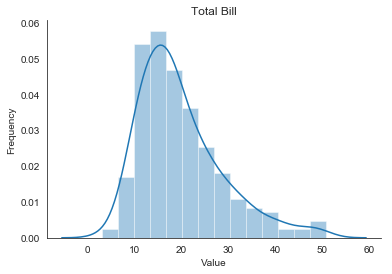

In [220]:

# create histogram
ttbill = sns.distplot(tips.total_bill);

# set lables and titles
ttbill.set(xlabel = 'Value', ylabel = 'Frequency', title = "Total Bill")

# take out the right and upper borders
sns.despine()


## Step 6. Create a scatter plot presenting the relationship between total_bill and tip

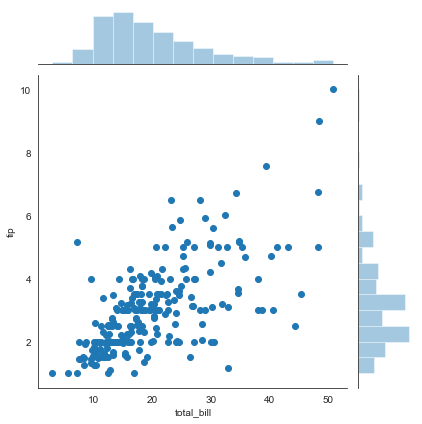

In [221]:
sns.jointplot(x ="total_bill", y ="tip", data = tips)

## Step 7. Create one image with the relationship of total_bill, tip and size.

## Hint: It is just one function.

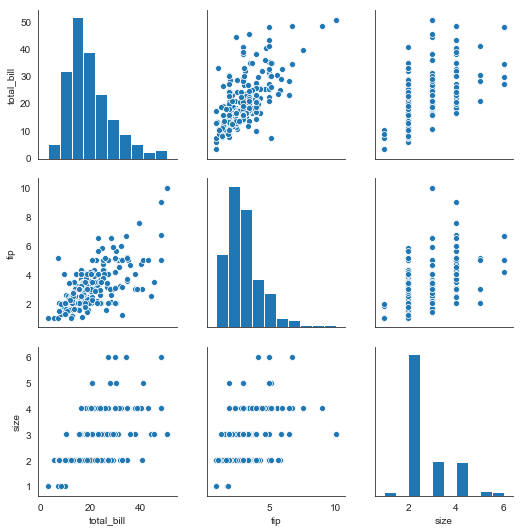

In [222]:
sns.pairplot(tips)


## Step 8. Present the relationship between days and total_bill value

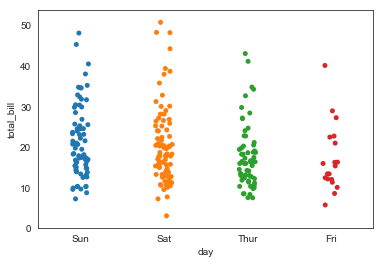

In [223]:
sns.stripplot(x = "day", y = "total_bill", data = tips, jitter = True);


## Step 9. Create a scatter plot with the day as the y-axis and tip as the x-axis, differ the dots by sex

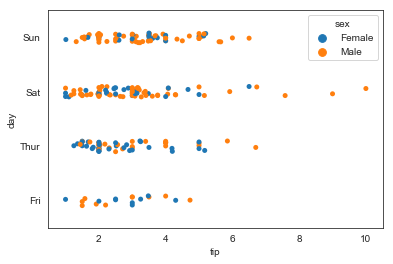

In [224]:
sns.stripplot(x = "tip", y = "day", hue = "sex", data = tips, jitter = True);


## Step 10. Create a box plot presenting the total_bill per day differetiation the time (Dinner or Lunch)

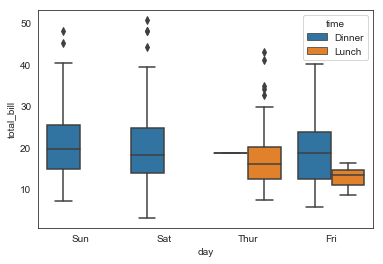

In [226]:

sns.boxplot(x = "day", y = "total_bill", hue = "time", data = tips);

## Step 11. Create two histograms of the tip value based for Dinner and Lunch. They must be side by side.

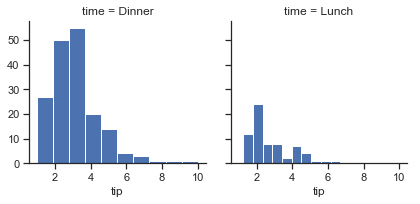

In [227]:
# better seaborn style
sns.set(style = "ticks")

# creates FacetGrid
g = sns.FacetGrid(tips, col = "time")
g.map(plt.hist, "tip");

## Step 12. Create two scatterplots graphs, one for Male and another for Female, presenting the total_bill value and tip relationship, differing by smoker or no smoker They must be side by side.

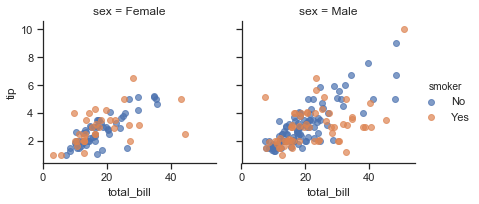

In [228]:
g = sns.FacetGrid(tips, col = "sex", hue = "smoker")
g.map(plt.scatter, "total_bill", "tip", alpha =.7)

g.add_legend();